# Import required Libraries

In [1]:
import os
import tweepy as tw
import pandas as pd

# Twitter Keys and Access Tokens

In [2]:
api_key = "Ruq3ombVVxqBrlZpO25EWXln6"

api_key_secret = "OZvoioUlBQ5hJbabDQBqKBlS2bSND4P9DJalFYwQMgmeCMsTGE"

access_token = "722321034-U90pjwxi3QGNBMKD22Dr1oaVNSvdLkSxft1gWKPS"

access_token_secret = "Fvfr3lNJMsrAzDcV8lF3Nd7Xm9FakyTRoQLWI54oQ0rFA"

# Authenticating the twitter API

In [3]:
auth = tw.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth)
api = tw.API(auth,wait_on_rate_limit=True)


# retrieve tweets related to joe Biden

In [4]:
search_words = "Joe Biden" # This will be changed to Donald Trump when we retrieve tweets related to him.
date_since = "2020-10-27"

# Use Time period to retrieve tweets

In [5]:
tweets = tw.Cursor(api.search, q=search_words, lang="en", since="2020-10-27").items(100)

In [6]:
tweets

# We also fetch the user_location

In [7]:
tweet_details = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [8]:
tweet_df = pd.DataFrame(data=tweet_details, columns=["geo","text","user","location"])

In [9]:
pd.set_option('max_colwidth',100)
tweet_df.head(20)

,geo,text,user,location
0,None,"RT @miltimore79: Facebook doesn't like it that people are pointing out that Joe Biden, who just ...",Fckritendopsy,
1,None,RT @newsmax: Singer Bette Midler called on authorities to arrest former President Donald Trump f...,MCommomer,
2,None,"RT @miltimore79: Facebook doesn't like it that people are pointing out that Joe Biden, who just ...",fatherdaddy,Texas & California
3,None,RT @DonaldJTrumpJr: Given how terrible Biden sounds right now I’m wondering when the 25th Amendm...,AlyAshleyy,
4,None,"RT @ABC: For months, President Joe Biden has taken it on the chin from Republicans over his hand...",tramlaw301,"Boston, MA"
5,None,Joe Biden insists he’s a friend to Canada. The evidence suggests otherwise https://t.co/WxP9ylDexQ,StarCdnPoli,Toronto
6,None,Obama always fudged the unemployment numbers while in office and it looks like Joe Biden learned...,TameraL36320095,
7,None,@AmeliaStanley4 @TerryJackson13 @Morning_Joe @foxandfriends @NewDay Shame you don’t pay more att...,annmill1966,
8,None,RT @DonaldJTrumpJr: Given how terrible Biden sounds right now I’m wondering when the 25th Amendm...,mcdoeringmaccom,
9,None,Let me help you out. Joe Biden is the President. He defeated The Orange Devil in the election. D...,TennesseeTeek,"Chattanooga, TN"


# clean data

In [10]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [11]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df['Subject'] = search_words
tweet_df.head(20)

,geo,text,user,location,Subject
0,None,"Facebook doesn't like it that people are pointing out that Joe Biden, who just passed a travel ...",Fckritendopsy,,Joe Biden
1,None,"Singer Bette Midler called on authorities to arrest former President Donald Trump for ""attempte...",MCommomer,,Joe Biden
2,None,"Facebook doesn't like it that people are pointing out that Joe Biden, who just passed a travel ...",fatherdaddy,Texas & California,Joe Biden
3,None,Given how terrible Biden sounds right now I’m wondering when the 25th Amendment talks will star...,AlyAshleyy,,Joe Biden
4,None,"For months, President Joe Biden has taken it on the chin from Republicans over his handling of ...",tramlaw301,"Boston, MA",Joe Biden
5,None,Joe Biden insists he’s a friend to Canada. The evidence suggests otherwise,StarCdnPoli,Toronto,Joe Biden
6,None,Obama always fudged the unemployment numbers while in office and it looks like Joe Biden learned...,TameraL36320095,,Joe Biden
7,None,Shame you don’t pay more attention to Trump kid…,annmill1966,,Joe Biden
8,None,Given how terrible Biden sounds right now I’m wondering when the 25th Amendment talks will star...,mcdoeringmaccom,,Joe Biden
9,None,Let me help you out. Joe Biden is the President. He defeated The Orange Devil in the election. D...,TennesseeTeek,"Chattanooga, TN",Joe Biden


# Maping State_name with its symbol

In [12]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

# Save data to csv formate

In [13]:
tweet_copied_df.to_csv('tweets_election.csv', header=False, mode='a')

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sid = SentimentIntensityAnalyzer()

# Remove all data without Location

In [16]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

C:\Users\Roshan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved in...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because the number is almost n...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to undermine your righ...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has d...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [17]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

C:\Users\Roshan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
2928,NaN,Unfortunately she along with other politicians will never receive the justice they…,gmollo1115,"Georgia, USA",Joe Biden,Georgia
2929,NaN,Let’s talk about the Hunter laptop and such. Oh wait Biden blindness won’t allow that. Dirty jo...,mcritter61,"Houston, TX",Joe Biden,Texas
2930,NaN,Fun to think about how we learned today that Trump and Barr did with Turkey the exact thing Tru...,1kingsbay,"on the river, FL",Joe Biden,Florida
2931,NaN,"Larry Kudlow: Joe Biden's economic plan would crush US economy, decimate jobs.",JanedgeJanis,"Texas, USA",Joe Biden,Texas
2932,NaN,A 64-page document asserting an elaborate conspiracy theory involving Joe Biden's son and busin...,denopotter,"Dallas, TX",Joe Biden,Texas


# comparision of tweet in the US state

Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

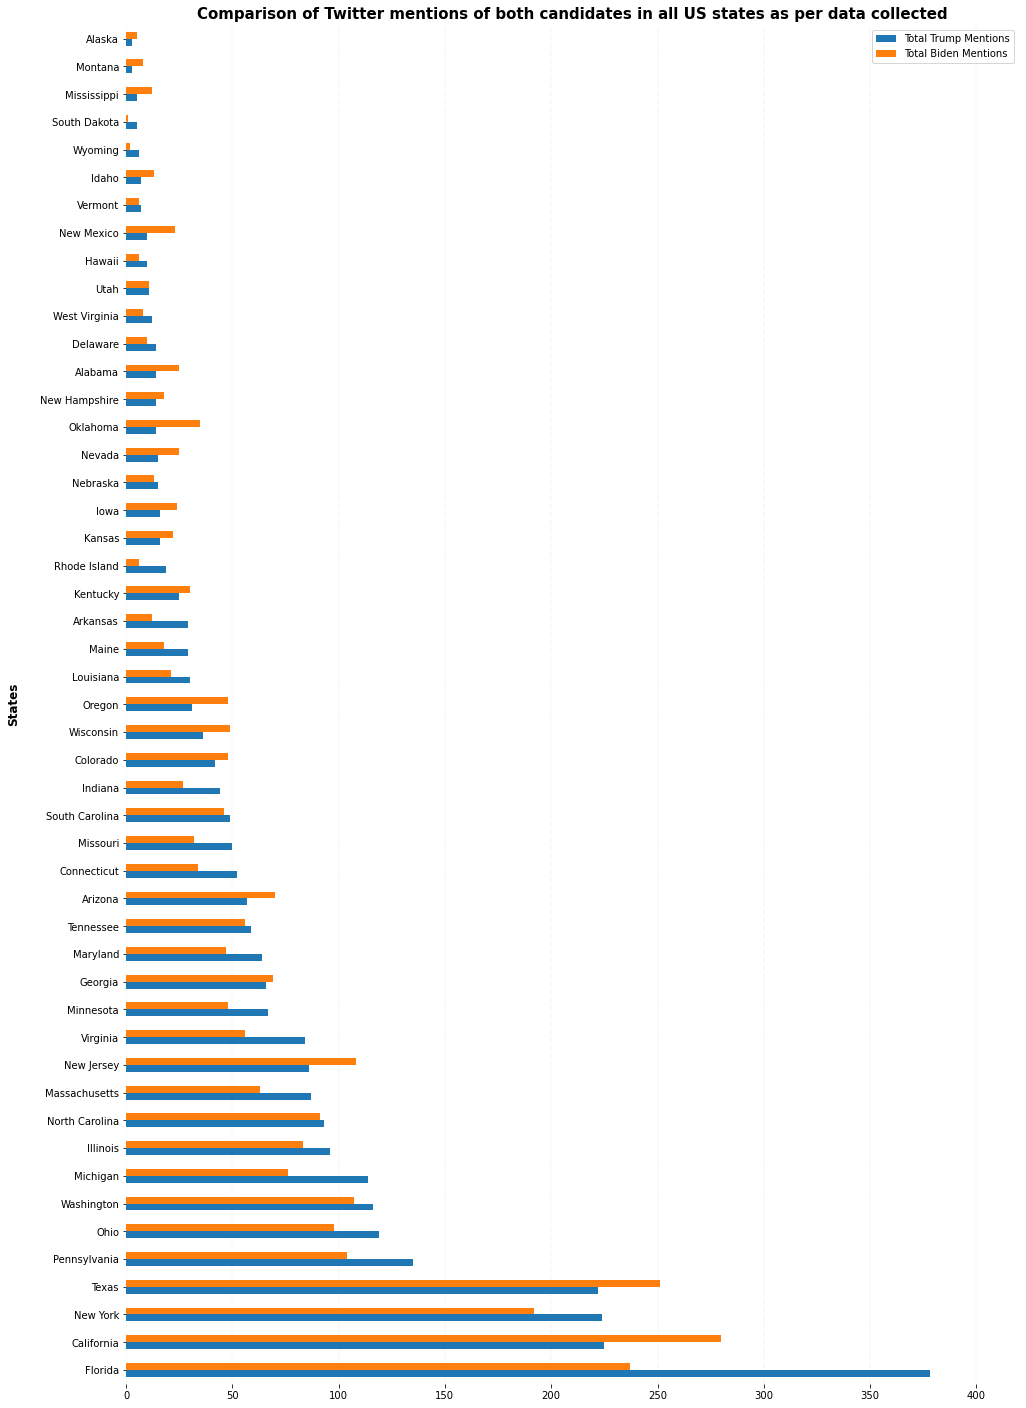

In [18]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

# Find the polarity of each candidate

In [19]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

<ipython-input-19-bd698c315da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-19-bd698c315da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))


# List the sentiment_view on the basic of Polarity Value

In [20]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [21]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(20)

<ipython-input-21-5abfc56d60c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved in...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4939}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'compound': -0.5267}",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because the number is almost n...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0772}",Positive
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to undermine your righ...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'compound': -0.196}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has d...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'compound': 0.0516}",Positive
5,NaN,'A vote for Donald Trump is a vote against the very ideals upon which our democracy was founded'...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.2716}",Positive
6,NaN,There is no greater supporter of Donald Trump in the world than Mark Zuckerberg / .No one has d...,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'compound': 0.0516}",Positive
7,NaN,"The same people who are outraged at AOC for slipping into a borrowed $14,000 outfit for a Vanit...",SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'compound': -0.6705}",Negative
8,NaN,Donald Trump is on track to become the worst jobs president in modern American history.,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.6249}",Negative
9,NaN,"It is Friday, October 30, 2020. One citizen, I call for the removal from office by any legal mea...",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.128}",Positive


In [22]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

<ipython-input-22-110e7736d739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
2928,NaN,Unfortunately she along with other politicians will never receive the justice they…,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.6341}",Negative
2929,NaN,Let’s talk about the Hunter laptop and such. Oh wait Biden blindness won’t allow that. Dirty jo...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'compound': -0.25}",Negative
2930,NaN,Fun to think about how we learned today that Trump and Barr did with Turkey the exact thing Tru...,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.5106}",Positive
2931,NaN,"Larry Kudlow: Joe Biden's economic plan would crush US economy, decimate jobs.",JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}",Negative
2932,NaN,A 64-page document asserting an elaborate conspiracy theory involving Joe Biden's son and busin...,denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.5267}",Negative
2933,NaN,"He is a profoundly decent man: a man of faith and compassion; willing to listen, capable of evo...",afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8126}",Positive
2934,NaN,"Every CNN show should end with ""I'm Joe Biden, and I approved this message.""",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}",Positive
2935,NaN,"Rest assured, that’s my best friend who wrote the article and I know he’d never vote for someon…",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'compound': 0.872}",Positive
2936,NaN,"Winston Churchill’s granddaughter, Edwina Sandys, joins the fight.""I rarely wade into the polit...",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2937,NaN,"If Sleepy Joe Biden is actually elected President, the 4 Justices (plus1) that helped make such...",weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'compound': 0.3182}",Positive


# Now that we have classified every tweet data as either positive, negative or neutral, we can group by state and understand the general opinion of the public

In [23]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative               4
                Neutral                3
                Positive               7
Alaska          Neutral                1
                Positive               2
Arizona         Negative              17
                Neutral               20
                Positive              20
Arkansas        Negative               6
                Neutral               12
                Positive              11
California      Negative              87
                Neutral               51
                Positive              87
Colorado        Negative              14
                Neutral                9
                Positive              19
Connecticut     Negative              19
                Neutral               17
                Positive              16
Delaware        Negative               4
                Neutral                6
                Positive               4
Florida         Negativ

In [24]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              10
                Neutral                9
                Positive               6
Alaska          Negative               2
                Neutral                1
                Positive               2
Arizona         Negative              24
                Neutral               19
                Positive              27
Arkansas        Negative               3
                Neutral                4
                Positive               5
California      Negative             119
                Neutral               71
                Positive              90
Colorado        Negative              17
                Neutral               13
                Positive              18
Connecticut     Negative              13
                Neutral               11
                Positive              10
Delaware        Negative               4
                Neutral                3
                Positiv

# Now we find the percentage of +ve,-ve,neutral expression and compare it

In [25]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,30,35,57,39,34,27,70
Arkansas,38,21,41,29,42,25,33,12
California,39,39,23,225,32,42,25,280
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,34,29,378,32,32,37,237


# Now we find the percentage of +ve,-ve,neutral expression in US state and predict the jugement

In [26]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Strongly Republican
Alaska,67,0,33,3,40,40,20,5,Insufficient Data
Arizona,35,30,35,57,39,34,27,70,Somewhat Democratic
Arkansas,38,21,41,29,42,25,33,12,Somewhat Democratic
California,39,39,23,225,32,42,25,280,Strongly Republican
Colorado,45,33,21,42,38,35,27,48,Strongly Republican
Connecticut,31,37,33,52,29,38,32,34,Strongly Republican
Delaware,29,29,43,14,30,40,30,10,Insufficient Data
Florida,37,34,29,378,32,32,37,237,Somewhat Republican


# Finally we count how the judgement is predicted

In [27]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data      13
Somewhat Democratic    10
Somewhat Republican     7
Strongly Democratic     7
Strongly Republican    13
dtype: int64